In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [33]:
# Function that reads the data from the Analytic integration
#Galactocentic distances and velocities
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

# Host coordinates and velocities
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

# Satellite coordinates and velocities
def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

#ICs
def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]

#Function that reads the N-body sumulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    time = data[:,0]
    Rgal = data[:,1]
    x_sat= data[:,2]
    y_sat = data[:,3]
    z_sat = data[:,4]
    x_gal = data[:,5]
    y_gal = data[:,6]
    z_gal = data[:,7]
    Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,12]
    vy_gal = data[:,13]
    vz_gal = data[:,14]
    return time, Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal

def best_values(x, y, z, vx, vy, vz):
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    return x[index], y[index], z[index], vx[index], vy[index], vz[index]

In [35]:
tgal1, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, Rgal1, Vgal1 = reading_data('lmc6_MWpmdf1')
tNB, RgalNB, xsatNB, ysatNB, zsatNB, xgalNB, ygalNB, zgalNB, vgalNB, vxsatNB, vysatNB, vzsatNB, vxgalNB, vygalNB, vzgalNB\
= reading_Nbody('LMC6_H1.txt')

In [9]:
ric1, xic1, yic1, zic1, vxic1, vyic1, vzic1, tic1 = ICs(Rgal1, 280, xgal1, ygal1, zgal1, vxgal1, vygal1, vzgal1, tgal1)

In [10]:
RgNB = np.sqrt((xgalNB-xsatNB)**2.0 + (ygalNB - ysatNB)**2.0 + (zgalNB-zsatNB)**2.0)

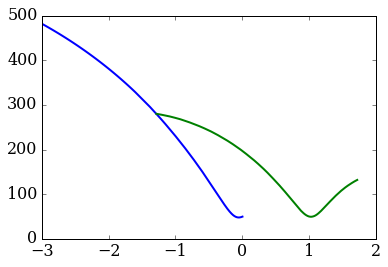

In [21]:
plot(tgal1, Rgal1, lw=2)
plot(tNB+tic1, RgNB, lw=2 )

In [34]:
print 'ICs for analytic iteration to match the Nbody orbit with differentd dfs:'
print 'x:', xsatNB[0]-xgalNB[0]
print 'y:', ysatNB[0]-ygalNB[0]
print 'z:', zsatNB[0]-zgalNB[0]

print 'vx:', vxsatNB[0]-vxgalNB[0]
print 'vy:', vysatNB[0]-vygalNB[0]
print 'vz:', vzsatNB[0]-vzgalNB[0]

ICs for analytic iteration to match the Nbody orbit with differentd dfs:
x: 32.730211
y: 278.171468
z: 1.216658
vx: -8.618636
vy: -161.739187
vz: -8.662027


In [36]:
print tNB[-1]

2.2


In [30]:
tgal05, xgal05, ygal05, zgal05, vxgal05, vygal05, vzgal05, Rgal05, Vgal05 = reading_data('lmc6_MWpmdf05')
tgal10, xgal10, ygal10, zgal10, vxgal10, vygal10, vzgal10, Rgal10, Vgal10 = reading_data('lmc6_MWpmdf10')
tgal15, xgal15, ygal15, zgal15, vxgal15, vygal15, vzgal15, Rgal15, Vgal15 = reading_data('lmc6_MWpmdf15')
tgal18, xgal18, ygal18, zgal18, vxgal18, vygal18, vzgal18, Rgal18, Vgal18 = reading_data('lmc6_MWpmdf18')
tgal20, xgal20, ygal20, zgal20, vxgal20, vygal20, vzgal20, Rgal20, Vgal20 = reading_data('lmc6_MWpmdf20')


(0, 300)

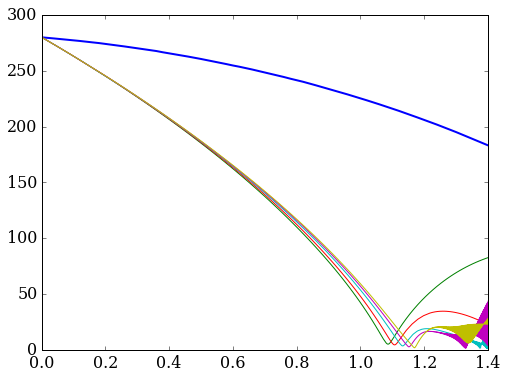

In [31]:
figure(figsize=(8, 6))
plot(tNB, RgNB, lw=2 )
plot(tgal05, Rgal05)
plot(tgal10, Rgal10)
plot(tgal15, Rgal15)
plot(tgal18, Rgal18)
plot(tgal20, Rgal20)
xlim(0.0, 1.4)
ylim(0, 300)

In [28]:
tgal05b, xgal05b, ygal05b, zgal05b, vxgal05b, vygal05b, vzgal05b, Rgal05b, Vgal05b = reading_data('lmc6_MWpmdf05b')
tgal08b, xgal08b, ygal08b, zgal08b, vxgal08b, vygal08b, vzgal08b, Rgal08b, Vgal08b = reading_data('lmc6_MWpmdf08b')

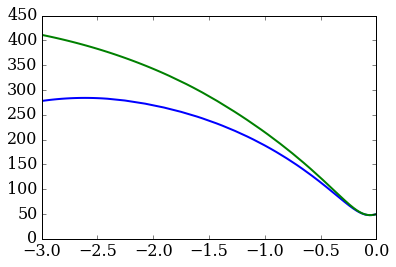

In [29]:
plot(tgal05b, Rgal05b, lw=2)
plot(tgal08b, Rgal08b, lw=2)

In [17]:
ric05, xic05, yic05, zic05, vxic05, vyic05, vzic05, tic05 = ICs(Rgal05b, 280,  xgal05b, ygal05b, zgal05b, vxgal05b, vygal05b, vzgal05b, tgal05b)
ric08, xic08, yic08, zic08, vxic08, vyic08, vzic08, tic08 = ICs(Rgal08b, 300,  xgal08b, ygal08b, zgal08b, vxgal08b, vygal08b, vzgal08b, tgal08b)

In [18]:
print xic05, yic05, zic05, vxic05, vyic05, vzic05
print xic08, yic08, zic08, vxic08, vyic08, vzic08

11.584929 247.791118 129.901859 11.910111 11.210542 -77.135969
29.251769 295.60925 42.347654 -0.991658 -107.209875 -85.508272


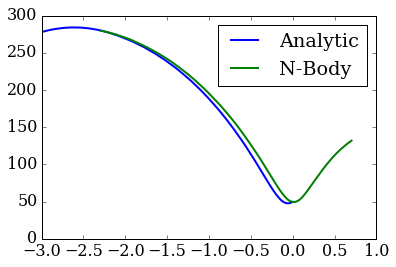

In [32]:
plot(tgal05b, Rgal05b, lw=2, label='Analytic')
plot(tNB+tic05, RgNB, lw=2, label='N-Body')
legend()

In [36]:
XNB =  xsatNB-xgalNB
YNB =  ysatNB-ygalNB
ZNB =  zsatNB-zgalNB
vxNB = vxsatNB - vxgalNB
vyNB = vysatNB - vygalNB
vzNB = vzsatNB - vzgalNB

In [37]:
best_values(XNB, YNB, ZNB, vxNB, vyNB, vzNB)

(array([-1.188773]),
 array([-44.966176]),
 array([-27.307176]),
 array([-66.796694]),
 array([-245.392623]),
 array([ 229.848162]))